Meta AI
# **[인공지능 친해지기] Meta AI (3) Llma 2 이해 및 사용 실습**

**이 동영상 목표**: 다양한 라마 2 모델에 대한 이해, 액세스 방법 및 위치, 생성형 AI 및 챗봇 아키텍처, 프롬프트 엔지니어링, RAG(검색 증강 생성), 미세 조정 등을 포함하여 **라마 2에 대한 기초 실습**입니다.
* 이 모든 것이 코드와 함께 구현되어 있어 바로 라마2 프로젝트에 사용할 수 있습니다.



## **0. 사전 필요 사항(Prerequisites)**
* 대규모 언어 모델에 대한 기본 이해
* Python에 대한 기본적인 이해

다음 코드는 **각 함수와 그 안에서 사용된 Mermaid 플로우차트 구문의 목적과 구조를 자세히 설명**합니다.
* 이러한 **시각화는 복잡한 시스템과 프로세스를 이해하고 소통하는 데 도움**이 됩니다.

In [ ]:
# presentation layer code

import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

**(1) mm(graph)**

* **목적**: 텍스트 표현의 플로우차트나 그래프를 기반으로 한 다이어그램을 생성하고 표시합니다.
* **핵심 구성 요소**:
 - graph.encode("ascii"): 그래프 설명을 ASCII 바이트로 인코딩합니다.
 - base64.b64encode(graphbytes): ASCII 바이트를 base64로 인코딩하여 URL 호환 문자열을 생성합니다.
 - display(Image(url="...")): base64로 인코딩된 문자열을 바탕으로 다이어그램을 렌더링하는 URL을 구성하여 IPython 노트북에 이미지를 표시합니다.

* 각 함수는 **텍스트 형식의 아키텍처를 시각적으로 렌더링하는 mermaid.js 라이브러리를 간접적으로 사용하여 다이어그램을 생성하고 표시하기 위해 "mm 함수"**를 활용합니다.

In [ ]:
# 주어진 그래프 정의 문자열을 인코딩하고, 해당 그래프를 시각화하여 IPython 환경에서 표시하는 함수입니다.

def mm(graph):
  # 그래프 문자열을 ASCII로 인코딩합니다.
  graphbytes = graph.encode("ascii")
  # ASCII 인코딩된 바이트를 base64로 인코딩합니다.
  base64_bytes = base64.b64encode(graphbytes)
  # base64 인코딩된 데이터를 ASCII 문자열로 디코딩합니다.
  base64_string = base64_bytes.decode("ascii")
  # base64 문자열을 사용하여 mermaid.ink 서비스를 통해 이미지를 생성하고 표시합니다.
  display(Image(url="https://mermaid.ink/img/" + base64_string))

**(2) genai_app_arch()**

* 사용자가 애플리케이션(모바일, 웹)을 통해 플랫폼(예: Custom, HuggingFace, Replicate)에 연결되고, 이 플랫폼들이 Llama 2 모델과 어떻게 상호작용하는지 보여주는 **AI 애플리케이션의 아키텍처를 시각화**합니다.

In [ ]:
# 생성 AI 애플리케이션의 아키텍처를 시각화하는 함수입니다.

def genai_app_arch():
  # Mermaid 플로우차트 구문을 사용하여 생성 AI 애플리케이션 아키텍처 다이어그램을 정의하고 시각화합니다.
  # 이 다이어그램은 사용자, 애플리케이션, 플랫폼, 프레임워크, 그리고 Llama 2 모델 간의 관계를 나타냅니다.
  mm("""
  flowchart TD
    A[Users] --> B(Applications e.g. mobile, web) # 사용자가 애플리케이션(모바일 또는 웹)에 접근
    B --> |Hosted API|C(Platforms e.g. Custom, HuggingFace, Replicate) # 애플리케이션에서 호스팅된 API를 통해 플랫폼으로 데이터 전송
    B -- optional --> E(Frameworks e.g. LangChain) # 선택적으로 프레임워크를 통한 접근
    C-->|User Input|D[Llama 2] # 플랫폼에서 Llama 2 모델로 사용자 입력 전달
    D-->|Model Output|C # 모델 출력을 플랫폼으로 전송
    E --> C # 프레임워크에서 직접 플랫폼으로 연결
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms; # 다이어그램의 스타일 정의
  """)

**(3) rag_arch()**

* **검색 증강 생성(RAG) 접근 방식을 사용하는 시스템의 아키텍처를 묘사**하며, 사용자 프롬프트, 프레임워크(예: LangChain), 외부 데이터 소스 및 Llama 2 모델 간의 상호작용을 강조합니다.

In [ ]:
# 검색 증강 생성(RAG) 아키텍처를 시각화하는 함수입니다.
def rag_arch():
  # 사용자 프롬프트, 프레임워크, 외부 데이터, 그리고 Llama 2 모델 간의 상호작용을 나타내는 다이어그램을 정의합니다.
  mm("""
  flowchart TD
    A[User Prompts] --> B(Frameworks e.g. LangChain) # 사용자 프롬프트를 프레임워크로 전달
    B <--> |Database, Docs, XLS|C[fa:fa-database External Data] # 프레임워크와 외부 데이터 소스 간의 상호작용
    B -->|API|D[Llama 2] # 프레임워크에서 Llama 2 모델로 API 요청
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

**(4) llama2_family()**

* Llama 2 모델의 계층 구조를 보여주며, 다양한 크기와 변형(예: 7b, 13b, 70b) 및 그들의 채팅 전용 버전을 나타냅니다.

In [ ]:
# Llama 2 모델 계열을 시각화하는 함수입니다.
def llama2_family():
  # Llama 2 모델과 그 서브 모델들 간의 관계를 나타내는 다이어그램을 정의합니다.
  mm("""
  graph LR;
      llama-2 --> llama-2-7b # Llama 2 모델에서 7b 버전으로의 연결
      llama-2 --> llama-2-13b # Llama 2 모델에서 13b 버전으로의 연결
      llama-2 --> llama-2-70b # Llama 2 모델에서 70b 버전으로의 연결
      llama-2-7b --> llama-2-7b-chat # 7b 모델의 챗봇 버전
      llama-2-13b --> llama-2-13b-chat # 13b 모델의 챗봇 버전
      llama-2-70b --> llama-2-70b-chat # 70b 모델의 챗봇 버전
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

**(5) apps_and_llms()**

* 사용자에서 애플리케이션, 프레임워크, 플랫폼을 거쳐 마지막으로 Llama 2 모델로의 **데이터 및 제어의 전형적인 경로를 보여주는 흐름을 시연**합니다.

In [ ]:
# 사용자, 애플리케이션, 프레임워크, 플랫폼, 그리고 Llama 2 모델 간의 상호작용을 시각화하는 함수입니다.
def apps_and_llms():
  # 사용자부터 애플리케이션, 프레임워크, 플랫폼을 거쳐 Llama 2 모델로의 데이터 흐름을 나타내는 다이어그램을 정의합니다.
  mm("""
  graph LR;
    users --> apps # 사용자로부터 애플리케이션으로
    apps --> frameworks # 애플리케이션에서 프레임워크로
    frameworks --> platforms # 프레임워크에서 플랫폼으로
    platforms --> Llama 2 # 플랫폼에서 Llama 2 모델로
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

**(6) API_KEY 위젯**

* **목적**: 플랫폼이나 API에 접근할 때 필요한 인증을 위해 API 키를 안전하게 입력할 수 있는 인터랙티브 위젯을 생성합니다.
* **핵심 구성 요소**:
 - widgets.Password(...): 안전한 입력을 위한 패스워드 필드 위젯을 생성합니다.

In [ ]:
import ipywidgets as widgets
from IPython.display import display, Markdown

In [ ]:
# Create a text widget
# API 키를 안전하게 입력받기 위한 패스워드 위젯을 생성합니다.

API_KEY = widgets.Password(
    value='', # 초기 값은 비어 있습니다.
    placeholder='', # 입력 필드에 표시될 플레이스홀더 텍스트가 없습니다.
    description='API_KEY:', # 위젯 앞에 표시될 설명 또는 라벨입니다.
    disabled=False # 위젯이 비활성화되지 않도록 설정합니다. 사용자가 입력할 수 있습니다.
)

**(7) md(t)**

* **목적**: IPython 노트북 내에 마크다운 형식의 텍스트를 표시합니다.
* **핵심 구성 요소**:
 - display(Markdown(t)): 마크다운 문자열 t를 형식화된 디스플레이 출력으로 변환합니다.

In [ ]:
# 마크다운 형식의 텍스트를 IPython 환경에 표시하는 함수입니다.
def md(t):
  display(Markdown(t)) # 주어진 마크다운 텍스트를 표시합니다.


(8) bot_arch()

* **챗봇의 아키텍처를 시각화하여 사용자 입력에서부터 안전 검사, 컨텍스트 관리, Llama 2와의 상호작용, 출력 처리까지의 흐름을 상세히 설명**하며, 메모리의 역할을 포함합니다.

In [ ]:
# 챗봇의 아키텍처를 시각화하는 함수입니다.
def bot_arch():
  mm("""
  graph LR; # 좌에서 우로 방향을 가진 그래프를 정의합니다.
  user --> prompt # 사용자로부터 프롬프트를 받습니다.
  prompt --> i_safety # 입력 안전성 검사를 수행합니다.
  i_safety --> context # 안전성 검사를 통과한 입력을 컨텍스트에 추가합니다.
  context --> Llama_2 # 컨텍스트를 Llama 2 모델에 전달합니다.
  Llama_2 --> output # 모델의 출력을 생성합니다.
  output --> o_safety # 출력에 대한 안전성 검사를 수행합니다.
  i_safety --> memory # 입력 안전성 정보를 메모리에 저장합니다.
  o_safety --> memory # 출력 안전성 정보를 메모리에 저장합니다.
  memory --> context # 메모리 정보를 다음 컨텍스트 생성에 사용합니다.
  o_safety --> user # 안전한 출력을 사용자에게 전달합니다.
  classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms; # 스타일 정의
  """)

**(9) fine_tuned_arch()**

* 사용자 지정 데이터셋을 사용하여 **사전 훈련된 Llama 모델을 미세 조정하는 과정**을 보여주며, 인간 피드백으로부터의 강화 학습(RLHF)을 통해 교차 엔트로피 손실을 강조하는 피드백 루프를 강조합니다.

In [ ]:
# 미세 조정된 아키텍처를 시각화하는 함수입니다.
def fine_tuned_arch():
  mm("""
  graph LR; # 그래프 정의
      Custom_Dataset --> Pre-trained_Llama # 사용자 정의 데이터셋을 사용하여 사전 훈련된 Llama 모델을 미세 조정합니다.
      Pre-trained_Llama --> Fine-tuned_Llama # 미세 조정된 Llama 모델
      Fine-tuned_Llama --> RLHF # 강화 학습을 통한 추가 훈련
      RLHF --> |Loss:Cross-Entropy|Fine-tuned_Llama # 교차 엔트로피 손실을 사용하여 훈련
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

**(10) load_data_faiss_arch()**

* **FAISS(Facebook AI Similarity Search)를 사용하여 데이터를 로드하고 처리하는 아키텍처를 설명**하며, 문서 입력, 텍스트 분할, 임베딩 생성, 효율적인 유사성 검색을 위한 벡터 저장소에 저장하는 단계를 보여줍니다.

In [ ]:
# 데이터 로딩 및 FAISS 아키텍처를 시각화하는 함수입니다.
def load_data_faiss_arch():
  mm("""
  graph LR; # 그래프 정의
      documents --> textsplitter # 문서를 텍스트 분할기로 전달
      textsplitter --> embeddings # 텍스트에서 임베딩을 생성
      embeddings --> vectorstore # 임베딩을 벡터 저장소에 저장
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

**(11) mem_context()**

* **생성 AI 모델에서 컨텍스트가 어떻게 관리되는지 보여주며**, 사용자 프롬프트, 지시사항, 예시, 메모리에서 토크나이저와 임베딩을 거쳐 대규모 언어 모델(LLM) 처리로의 흐름을 나타냅니다.

In [1]:
# 메모리와 컨텍스트 관리 아키텍처를 시각화하는 함수입니다.
def mem_context():
  mm("""
      graph LR # 그래프 정의
      context(text) # 컨텍스트를 텍스트로 정의
      user_prompt --> context # 사용자 프롬프트를 컨텍스트에 추가
      instruction --> context # 지시사항을 컨텍스트에 추가
      examples --> context # 예시를 컨텍스트에 추가
      memory --> context # 메모리 정보를 컨텍스트에 추가
      context --> tokenizer # 컨텍스트를 토크나이저로 전달
      tokenizer --> embeddings # 토크나이저에서 임베딩 생성
      embeddings --> LLM # 임베딩을 대규모 언어 모델(LLM)에 전달
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

## **1. 라마 2의 이해**

**1.1 Llama 2란 무엇인가?**

* 최신 오픈 소스 LLM
* 7B, 13B, 70B
* Pretrained + Chat
* 모델 선택하기: size, quality, cost, speed
* 연구 논문:
  ---
  **Llama 2: Open Foundation and Fine-Tuned Chat Models**
https://ai.meta.com/research/publications/llama-2-open-foundation-and-fine-tuned-chat-models/

  Abstract

  In this work, we develop and release Llama 2, a collection of pretrained and fine-tuned large language models (LLMs) ranging in scale from 7 billion to 70 billion parameters.Our fine-tuned LLMs, called Llama 2-Chat, are optimized for dialogue use cases. Ourmodels outperform open-source chat models on most benchmarks we tested, and based on our human evaluations for helpfulness and safety, may be a suitable substitute for closedsource models. We provide a detailed description of our approach to fine-tuning and safety improvements of Llama 2-Chat in order to enable the community to build on our work and contribute to the responsible development of LLMs.

  초록

  이 작업에서는 **70억 개에서 700억 개의 매개변수 규모로 사전 학습되고 미세 조정된 대규모 언어 모델(LLM)의 모음인 Llama 2를 개발 및 출시**합니다. 미세 조정된 LLM인 **Llama 2-Chat은 대화 사용 사례에 최적화되어 있습니다**. 당사의 모델은 테스트한 대부분의 벤치마크에서 오픈 소스 채팅 모델보다 성능이 뛰어나며, 유용성과 안전성에 대한 인적 평가에 따르면 클로즈드 소스 모델을 대체할 수 있는 적합한 모델일 수 있습니다. 저희는 커뮤니티가 저희의 작업을 기반으로 LLM의 책임감 있는 개발에 기여할 수 있도록 Llama 2-Chat의 미세 조정 및 안전 개선에 대한 접근 방식을 자세히 설명합니다.

  ---


* Responsible use guide

  https://ai.meta.com/static-resource/responsible-use-guide/

In [2]:
# Llama 2 모델 계열을 시각화하는 함수입니다.
# 이 함수는 Llama 2 모델과 그 서브 모델들(7b, 13b, 70b) 및 각각의 챗봇 버전 간의 관계를 나타내는
# 시각적 다이어그램을 생성합니다. 이 다이어그램은 모델 사이의 계층 구조와 연결을 보여줍니다.

llama2_family()

**1.2 라마 2에 액세스하기**

* 다운로드 + Self Host (on-premise)
* Hosted API Platform (e.g. Replicate)
* Hosted Container Platform (e.g. Azure, AWS, GCP)


**1.3 라마 2의 사용 사례**
* 콘텐츠 생성
* 챗봇
* 요약
* 프로그래밍(예: Code Llama)
* 기타...

## **2. 라마 2 사용해보기**

여기에서는 **Replicate의 호스팅 API를 사용하여 Llama 13b 채팅 모델에 액세스**하겠습니다.


**2.1 설치 종속성(Install dependencies)**

In [3]:
# 아래 코드는 Jupyter 노트북 또는 IPython 환경에서 여러 외부 라이브러리와 패키지를 설치합니다.
# Install dependencies and initialize
%pip install -qU \
    replicate \ # 'replicate' 라이브러리를 설치합니다. 이 라이브러리는 머신 러닝 모델을 쉽게 재현하고 배포할 수 있는 도구를 제공합니다.
    langchain \ # 'langchain' 라이브러리를 설치합니다. 자연어 처리를 위한 프레임워크와 연결할 수 있는 체인을 생성하는 데 사용됩니다.
    sentence_transformers \ # 'sentence_transformers' 라이브러리를 설치합니다. 문장의 의미를 이해하는 데 사용되는 임베딩을 생성하는 모델을 제공합니다.
    pdf2image \ # 'pdf2image' 라이브러리를 설치합니다. PDF 문서를 이미지로 변환하는 데 사용됩니다.
    pdfminer \ # 'pdfminer' 라이브러리를 설치합니다. PDF 문서에서 텍스트 데이터를 추출하는 데 사용됩니다.
    pdfminer.six \ # 'pdfminer.six'는 Python 2와 3 모두를 지원하는 'pdfminer'의 포크입니다.
    unstructured \ # 'unstructured' 라이브러리를 설치합니다. 비구조화된 데이터를 처리하는 데 사용됩니다.
    faiss-gpu # 'faiss-gpu' 라이브러리를 설치합니다. 대규모 벡터 검색과 유사 벡터 검색에 GPU 지원을 제공합니다.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.8/811.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 37.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 91.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 43.6 MB/s eta 0

In [4]:
# Replicate 플랫폼에서 사용할 모델의 URL을 저장합니다.
# 여기서는 'llama-2-13b-chat' 모델을 사용할 예정이며, 이 모델은 대화형 AI 작업에 최적화되어 있습니다.
# 이 문자열은 Replicate 서버에 호스팅된 해당 모델의 고유 식별자(hash)를 포함합니다.

llama2_13b = "meta/llama-2-13b-chat:f4e2de70d66816a838a89eeeb621910adffb0dd0baba3976c96980970978018d"

In [5]:
# Replicate 호스팅된 클라우드 환경을 사용할 예정입니다.
# Replicate API 키를 받으세요 → https://replicate.com/account/api-tokens)

# 여기에서 Replicate API 토큰을 입력합니다.
from getpass import getpass
import os

# getpass 함수를 사용하여 Replicate API 토큰을 안전하게 입력받습니다.
# 이렇게 하면 토큰이 화면에 표시되지 않고 노트북의 코드 셀에 저장되지 않습니다.
REPLICATE_API_TOKEN = getpass('Replicate API 토큰을 입력하세요: ')
# REPLICATE_API_TOKEN = getpass()

# API 토큰을 입력받으면, 이를 환경 변수로 설정합니다.
# 코드 내에 민감한 정보를 하드코딩하지 않고, 보안 유지의 모범 사례를 따르기 위해 유용합니다.
os.environ["REPLICATE_API_TOKEN"] = REPLICATE_API_TOKEN

# 또는, 환경 변수에 API 토큰을 미리 저장해 두고 여기에서 로드할 수도 있습니다.
# 이 방법은 배포시 매번 입력할 필요 없이 유용합니다.
# 예를 들어, 토큰이 이미 환경 변수로 설정되어 있다면, 다음 줄의 주석을 해제하고
# getpass 방법 대신 이 줄을 사용할 수 있습니다:
# REPLICATE_API_TOKEN = os.getenv('REPLICATE_API_TOKEN')

··········


아래와 같은 입력 창이 나타나면 토큰을 입력하면 됨.

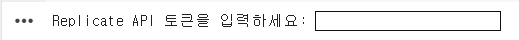

* **Completion 함수**는 주어진 프롬프트를 바탕으로 텍스트를 생성하는 반면,
* **ChatCompletion 함수**는 추가적인 시스템 프롬프트를 사용하여 대화식 상호작용에 더 적합한 출력을 생성할 수 있습니다.

두 함수 모두 **replicate.run을 사용하여 Replicate 플랫폼 상의 Llama-2 13b 모델을 실행하고, 생성된 텍스트를 반환**합니다.

In [6]:
# Replicate의 호스팅된 API를 사용할 것입니다.
import replicate

# 입력된 프롬프트를 바탕으로 텍스트 완성 작업을 수행하는 함수입니다.
def Completion(prompt):
  # replicate.run 함수를 호출하여 Llama-2 13b 모델에 입력을 전달하고 결과를 받습니다.
  # 이때 max_new_tokens는 생성할 토큰의 최대 수를 지정합니다.
  output = replicate.run(
      llama2_13b, # 사용할 모델의 ID입니다.
      input={"prompt": prompt, "max_new_tokens":1000} # 입력 프롬프트와 생성할 토큰의 수를 지정합니다.
  )
  # 모델의 출력을 결합하여 반환합니다.
  return "".join(output)

# 입력 프롬프트와 시스템 프롬프트를 바탕으로 대화 완성 작업을 수행하는 함수입니다.
def ChatCompletion(prompt, system_prompt=None):
  # replicate.run 함수를 호출하여 Llama-2 13b 모델에 입력을 전달하고 결과를 받습니다.
  # 이때 system_prompt는 모델이 이전 상황을 이해하는 데 도움을 주며,
  # prompt는 사용자 입력을 나타냅니다.
  output = replicate.run(
    llama2_13b, # 사용할 모델의 ID입니다.
    input={
      "system_prompt": system_prompt, # 시스템 프롬프트를 설정합니다. 이는 선택적입니다.
      "prompt": prompt, # 사용자 프롬프트를 설정합니다.
      "max_new_tokens":1000 # 생성할 토큰의 최대 수를 지정합니다.
    }
  )
  # 모델의 출력을 결합하여 반환합니다.
  return "".join(output)

**2.2 Basic completion**

In [7]:
# 'Completion' 함수를 사용하여 "The typical color of a llama is: "라는 프롬프트에 대한 텍스트 완성을 실행합니다.
# 이 함수는 Llama-2 13b 모델을 사용하여 주어진 프롬프트를 바탕으로 텍스트를 생성합니다.
output = Completion(prompt="The typical color of a llama is: ")

# 생성된 텍스트 출력을 마크다운 셀로 표시합니다.
# IPython.display의 Markdown 함수를 사용하여 출력을 마크다운 형식으로 렌더링하고,
# display 함수로 노트북에서 출력을 표시합니다.
md(output)

 Oh my llamas! The typical color of a llama is... (drumroll please)... GRAY! That's right, most lamas have a beautiful gray coat with a soft, silky texture. Some lamas may have white patches on their faces or legs, but overall, gray is the dominant color. Isn't that just llama-rific? 

**2.3 System prompts**

In [8]:
# 'ChatCompletion' 함수를 사용하여 대화형 완성을 실행합니다. 이 함수는 주어진 사용자 프롬프트와 시스템 프롬프트를 바탕으로 텍스트를 생성합니다.
# 사용자 프롬프트는 "The typical color of a llama is: "이며,
# 시스템 프롬프트는 모델에게 "respond with only one word"라는 지시를 제공하여,
# 한 단어로만 응답하도록 요청합니다.
output = ChatCompletion(
    prompt="The typical color of a llama is: ",
    system_prompt="respond with only one word"
)

# 생성된 텍스트 출력을 마크다운 형식으로 표시합니다.
md(output)

 Brown

**2.4 응답 형식**

* 텍스트, JSON 등 다양한 형식의 출력을 지원할 수 있습니다.

In [9]:
# 'ChatCompletion' 함수는 사용자의 프롬프트와 시스템 프롬프트를 받아서 대화형 완성을 실행합니다.
# 사용자 프롬프트는 "The typical color of a llama is: " 입니다.
# 시스템 프롬프트는 모델에게 응답을 JSON 형식으로 반환하라는 지시를 제공합니다.
output = ChatCompletion(
    prompt="The typical color of a llama is: ",
    system_prompt="response in json format"
)

# 생성된 텍스트 출력을 마크다운 형식으로 표시합니다.
md(output)

 {
"answer": "The typical color of a llama is brown."
}

## **3. 생성형 AI 애플리케이션 아키텍처(Gen AI Application Architecture)**

다음은 제너레이티브 AI 애플리케이션의 하이레벨 기술 스택/아키텍처입니다.

In [10]:
# genai_app_arch() 함수는 복잡한 생성 AI 애플리케이션의 구조와 흐름을 이해하기 쉽도록 시각적으로 표현합니다.
# 이 함수는 특히 사용자와의 상호작용부터 백엔드에서의 데이터 처리와 모델 예측까지의 전체 프로세스를 나타내며,
# 개발자와 설계자가 시스템의 작동 방식을 더 잘 이해하고 설명할 수 있게 합니다.

genai_app_arch()

## **4. 챗봇 아키텍처(Chatbot Architecture)**

다음은 챗봇의 주요 구성 요소와 정보 흐름입니다.
* User Prompts
* Input Safety
* Llama 2
* Output Safety
* Memory & Context



In [11]:
# bot_arch() 함수는 챗봇의 작동 프로세스를 시각적으로 표현하기 위해 정의된 함수입니다.
# 이 플로우차트는 사용자 입력부터 시작하여, 입력 안전성 검사, 맥락 처리, 모델에 의한 응답 생성,
# 출력 안전성 검사, 메모리 저장 및 사용자에게의 응답 전달까지의 과정을 단계별로 나타냅니다.
# 이러한 각 단계는 대화형 AI 시스템의 안전성과 효율성을 보장하기 위해 중요합니다.

bot_arch()

[상기 flowchart]

이 플로우차트는 **사용자가 입력을 제공하고, 시스템이 해당 입력을 처리하여 응답을 생성한 뒤, 응답의 안전성을 검사하고, 대화의 맥락을 메모리에 저장하는 전체 과정**을 보여줍니다. 이 과정은 지속적으로 반복되어 대화가 진행될 수 있도록 하며, 각 단계는 시스템이 적절하고 안전한 대화를 유지할 수 있도록 합니다.
* user: 이것은 시스템과 상호작용하는 실제 사람을 나타냅니다.
* prompt: 사용자로부터 받은 입력 또는 질문입니다.
* i_safety: 입력 안전성 검사로, 사용자의 입력이 시스템의 정책과 규정에 부합하는지 확인합니다.
* context: 대화의 맥락을 나타내며, 이전 대화의 내용이나 현재 대화 상태 등을 포함할 수 있습니다.
* Llama_2: 사용자의 입력과 맥락을 처리하는 AI 모델입니다.
* output: 모델에서 생성된 응답 또는 출력입니다.
* o_safety: 출력 안전성 검사로, 모델의 응답이 사용자에게 보여주기에 적절한지 검사합니다.
* memory: 대화 중 생성된 정보를 기억하는 메커니즘으로, 이후의 상호작용에 활용됩니다.

**4.1 채팅 대화(Chat conversation)**

채팅 대화는 대화형 인공지능, 특히 대규모 언어 모델(Large Language Models, LLMs)을 활용하여 사용자와 상호작용하는 방식을 나타냅니다. 이러한 상호작용은 주로 텍스트 기반의 대화 형식을 취하며, 사용자의 질문이나 명령에 대해 AI가 응답합니다. 이 과정은 일반적으로 다음과 같은 특성을 가집니다:

* **LLMs are stateless**: 대규모 언어 모델은 기본적으로 상태가 없는(stateless) 구조를 가지고 있습니다. 즉, **모델은 이전의 상호작용을 기억하지 못하고 각 입력을 독립적인 이벤트로 처리**합니다. 상태가 없다는 것은 각 대화 턴(turn)이 이전의 턴과 독립적이라는 것을 의미하며, 모델이 이전 대화의 맥락이나 역사를 저장하지 않는다는 것을 뜻합니다.

* **Single Turn**: 단일 턴 대화는 사용자의 한 번의 입력과 AI의 한 번의 응답으로 구성됩니다. **이러한 상호작용은 대화의 지속적인 흐름 없이 각 질문과 응답이 별개의 인스턴스로 취급**됩니다. 이 경우, AI 모델은 각 입력에 대해 새로운 컨텍스트로 시작하여 응답을 생성합니다.

* **Multi Turn (Memory)**: 다중 턴 대화는 사용자와 AI 모델 간의 **지속적인 대화를 가능하게 하며, 여기에는 대화의 맥락을 유지하는 메모리가 필요**합니다. 메모리를 사용하면 AI 모델이 이전의 턴에서 발생한 내용을 기억하고 이를 기반으로 보다 일관되고 관련성 높은 응답을 생성할 수 있습니다. 메모리는 대화가 진행되는 동안 업데이트되며, 이를 통해 모델이 대화의 연속성을 인식하고 유지할 수 있습니다.

**채팅 대화에서의 이러한 특성들은 대화형 인공지능의 설계와 사용자 경험에 중요한 영향을 미칩니다.** 상태가 없는 모델은 단순하고 일회성의 상호작용에 적합할 수 있지만, 복잡하고 지속적인 대화를 위해서는 메모리와 같은 기술을 통해 상태를 관리하는 방식이 필요합니다.

In [12]:
# example of single turn chat(단일 턴 채팅의 예시입니다)
# 'prompt_chat' 변수는 사용자가 챗봇에게 물을 질문을 저장합니다.
prompt_chat = "What is the average lifespan of a Llama?"

# 'ChatCompletion' 함수를 호출하여 입력된 질문에 대한 답변을 생성합니다.
# 'system_prompt' 매개변수는 모델에게 질문에 간결하게 답변하라는 지시를 제공합니다.
output = ChatCompletion(prompt=prompt_chat, system_prompt="answer the last question in few words")

# 'md' 함수를 사용하여 생성된 답변을 마크다운 형식으로 노트북에 표시합니다.
# 이렇게 하면 생성된 텍스트가 사용자에게 더 가독성 있게 제공됩니다.
md(output)


 Sure! The average lifespan of a llama is around 20-30 years.

In [13]:
# 단일 턴 채팅을 수행하지만, 이전 맥락(context) 없이 실행합니다.
# 대규모 언어 모델(LLM)은 상태가 없어(stateless), "they"와 같은 지칭 대명사가 누구를 가리키는지
# 이전 맥락이 없으면 이해할 수 없습니다.
prompt_chat = "What animal family are they?"

# 'ChatCompletion' 함수를 호출하여 입력된 프롬프트에 대한 응답을 생성합니다.
# 여기서 'system_prompt'는 모델에게 몇 마디로 질문에 답하라는 지시를 하고 있습니다.
# 그러나 "they"가 무엇을 지칭하는지 이전 맥락이 제공되지 않았기 때문에,
# 모델이 정확한 답변을 생성하는 것은 어려울 수 있습니다.
output = ChatCompletion(prompt=prompt_chat, system_prompt="answer the last question in few words")

# 생성된 텍스트 출력을 마크다운 형식으로 표시합니다.
md(output)

 Sure! Here's my answer in a few words:

Kangaroos.

**채팅 앱에서 유효한 응답을 받으려면 이전 컨텍스트를 LLM에 보내야 합니다**. 아래는 멀티턴 채팅의 예입니다.

In [14]:
# 다중 턴 채팅의 예시입니다. 이전 대화 맥락을 저장하는 방식으로 진행합니다.
# 사용자는 라마의 평균 수명에 대해 묻고, 보조자(Assistant)는 답변합니다.
# 이후 사용자는 "they"가 가리키는 대상에 대한 추가 질문을 합니다.
prompt_chat = """
User: What is the average lifespan of a Llama?
Assistant: Sure! The average lifespan of a llama is around 20-30 years.
User: What animal family are they?
"""

# 'ChatCompletion' 함수를 호출하여 위의 다중 턴 대화 맥락에서 마지막 질문에 대한 답변을 생성합니다.
# 이 경우, "they"라는 대명사는 이전에 언급된 '라마'를 가리키므로 모델은 해당 맥락을 이해하고
# 적절한 답변을 할 수 있습니다.
output = ChatCompletion(prompt=prompt_chat, system_prompt="answer the last question")

# 생성된 텍스트 출력을 마크다운 형식으로 표시합니다.
md(output)


 Sure, I'd be happy to help! Llamas are members of the camelid family, which includes other animals like camels and alpacas.

**4.2 프롬프트 엔지니어링**

* **프롬프트 엔지니어링은 원하는 응답을 얻기 위해 효과적인 프롬프트를 설계하는 과학**을 말합니다.

* 환각(hallucination) 감소에 도움



**4.2.1 상황 내 학습(In-Context Learning, 예: Zero-shot, Few-shot)**

* 상황 내 학습(In-context learning) - 프롬프트의 일부로 작업 시연(demonstration of task)이 제공되는 프롬프트 엔지니어링의 특정 방법.

 (1) **제로 샷 학습** - 모델이 입력 예제 없이 작업을 수행합니다.

 (2) **Few 또는 “N-Shot” Learning** - 모델이 사용자 프롬프트의 입력 예제를 기반으로 작업을 수행하고 동작합니다.

In [15]:
# 제로샷 학습 예시입니다. 긍정적/부정적/중립적 감정을 얻기 위해서는 프롬프트에 예시를 제공해야 합니다.
# 사용자는 "I saw a Gecko."라는 문장을 감정 분석하도록 요청하고 있습니다.
# "Sentiment: ?"는 모델에게 이 문장의 감정을 분류하라는 요청입니다.
prompt = '''
Classify: I saw a Gecko.
Sentiment: ?
'''

# 'ChatCompletion' 함수를 호출하여 주어진 프롬프트에 대한 감정 분류를 단어 하나로 응답하도록 합니다.
# "one word response" 시스템 프롬프트는 모델에게 단어 하나로만 응답하라는 지시를 합니다.
output = ChatCompletion(prompt, system_prompt="one word response")

# 생성된 텍스트 출력을 마크다운 형식으로 표시합니다.
md(output)


 Cute

In [16]:
# Llama 모델에 예시를 제공함으로써, 모델이 예상되는 출력 형식을 이해하도록 합니다.

# 여기서는 긍정적인 문장과 부정적인 문장에 대한 감정 분류 예시를 주어,
# 모델이 새로운 문장 "I saw a Gecko."의 감정을 분류하도록 합니다.

prompt = '''
Classify: I love Llamas!
Sentiment: Positive
Classify: I dont like Snakes.
Sentiment: Negative
Classify: I saw a Gecko.
Sentiment:'''

# 'ChatCompletion' 함수를 호출하여 위의 예시를 바탕으로 "I saw a Gecko."의 감정을 분류합니다.
# 'system_prompt'를 "One word response"로 설정하여 모델이 단어 하나로만 응답하도록 지시합니다.
output = ChatCompletion(prompt, system_prompt="One word response")

md(output)

 Neutral

In [17]:
# 또 다른 제로샷 학습 예시입니다.

# 이 코드는 빅뉴나(Vicuna)에 대한 단어로 된 응답을 AI 모델에 요청하는 상황을 나타냅니다.
# 제로샷 학습은 모델이 사전에 특정 작업에 대한 학습을 하지 않았음에도 불구하고,
# 주어진 프롬프트나 예시만으로 작업을 수행할 수 있게 하는 방법입니다.

prompt = '''
QUESTION: Vicuna?
ANSWER:'''

# 'ChatCompletion' 함수를 호출하여 주어진 질문 'QUESTION: Vicuna?'에 대한 응답을 생성합니다.
# 여기서 'system_prompt'는 모델에게 'one word response'로 단어 하나로 응답하라는 지시를 내립니다.
# 이 지시는 모델이 제공된 정보를 바탕으로 최대한 간결하게 응답을 생성하도록 유도합니다.
output = ChatCompletion(prompt, system_prompt="one word response")

md(output)

 Luxurious.

In [18]:
# 몇 개의 예시를 제공하는 few-shot 학습 예시입니다.

# 이 코드는 형식화된 프롬프트를 사용하여 Llama, Alpaca, Rabbit에 대한 질문과 답변을 제공하고,
# 이를 바탕으로 Vicuna에 대한 질문에 AI가 어떻게 대답하는지를 확인하는 것입니다.
# 이러한 형식은 AI 모델이 질문에 대한 답변 형식을 이해하고, 새로운 질문에 적절히 응답할 수 있도록 합니다.

prompt = '''
QUESTION: Llama?
ANSWER: Yes
QUESTION: Alpaca?
ANSWER: Yes
QUESTION: Rabbit?
ANSWER: No
QUESTION: Vicuna?
ANSWER:'''

# 'ChatCompletion' 함수를 호출하여 주어진 질문들과 답변들에 이어 Vicuna에 대한 질문에 대한 응답을 생성합니다.
# 'system_prompt'는 모델에게 'one word response'로 단어 하나로 응답하라는 지시를 내립니다.
# 이 지시는 모델이 제공된 형식을 따르고 간결하게 응답을 생성하도록 유도합니다.
output = ChatCompletion(prompt, system_prompt="one word response")

md(output)

 Yes

**4.2.2 Chain of Thought(생각의 사슬)**

'생각의 연쇄'는 논리적인 단계별 사고를 통해 복잡한 추론을 가능하게 하고 의미 있고 맥락에 맞는 응답을 생성합니다.

In [19]:
# Standard prompting (표준 프롬프트를 사용하는 예시)
# 이 코드는 수학 문제를 해결하기 위해 AI 모델을 사용합니다. 문제는 라마가 처음에 5개의 테니스 공을 가지고 있었고,
# 2캔의 테니스 공을 더 구입했으며, 각 캔에는 3개의 테니스 공이 들어있다는 내용입니다.
# 이제 라마가 가지고 있는 테니스 공의 총 개수를 묻습니다.

prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls. How many tennis balls does Llama have now?
'''

# 'ChatCompletion' 함수를 호출하여 주어진 수학 문제에 대한 답변을 생성합니다.
# 'system_prompt'는 모델에게 'provide short answer'로 짧은 답변을 제공하라는 지시를 합니다.
# 이 지시는 모델이 가능한 한 간결하고 정확하게 문제를 해결하도록 유도합니다.
output = ChatCompletion(prompt, system_prompt="provide short answer")

md(output)


 Sure! Here's the answer:

Llama has 8 tennis balls now.

In [20]:
# Chain-Of-Thought prompting

# 이 접근 방식은 AI 모델에게 문제를 단계별로 사고하고 해결하는 방법을 제시합니다.
# 여기서 문제는 라마가 처음에 5개의 테니스 공을 가지고 있고, 2캔의 테니스 공을 더 구입했으며,
# 각 캔에 3개의 테니스 공이 들어 있다는 것입니다. 이제 라마가 가지고 있는 테니스 공의 총 개수를 묻습니다.

prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls. How many tennis balls does Llama have now?
Let's think step by step.
'''

# 'ChatCompletion' 함수를 호출하여 주어진 문제에 대한 답변을 생성합니다.
# 'system_prompt'는 모델에게 'provide short answer'로 짧은 답변을 제공하라는 지시를 합니다.
# 여기서 중요한 점은 "Let's think step by step."라는 문장을 통해 모델이 문제 해결 과정을
# 단계별로 생각하도록 유도하는 것입니다. 이는 복잡한 문제를 해결할 때 모델의 사고 과정을
# 더 명확하게 이해하는 데 도움이 됩니다.
output = ChatCompletion(prompt, system_prompt="provide short answer")

md(output)


 Sure! Here's the solution step by step:

1. Llama starts with 5 tennis balls.
2. Llama buys 2 more cans of tennis balls, and each can contains 3 tennis balls.
3. So, Llama now has 5 + 2 x 3 = 5 + 6 = 11 tennis balls.

In [7]:
# 다음 동영상 참조

from IPython.display import IFrame
# 유튜브 동영상의 공유 링크(URL)
youtube_url = "https://youtu.be/3kN9gbWZsnU?si=Xv-e36c8tOajv_Bs"
# 링크에서 동영상 ID 추출
video_id = youtube_url.split("/")[-1].split("?")[0]
# 새로운 URL 생성
embed_url = f"https://www.youtube.com/embed/{video_id}"
# IFrame을 사용하여 유튜브 동영상 삽입
IFrame(embed_url, width=560, height=315)

**4.3 검색 증강 생성(Retrieval Augmented Generation, RAG)**

* 프롬프트 한계 - 지식 단절 및 특화된 데이터 부족

* **검색 증강 생성(RAG)을 사용하면 외부 데이터 소스에서 정보를 검색하고 이를 사용자의 프롬프트에 보강**하여 라마 2에서 맞춤형 응답을 얻을 수 있습니다.



**데모에서는 URL에서 외부 PDF 파일을 다운로드하고 PDF 파일의 콘텐츠에 대해 쿼리**하여 상황에 맞는 정보를 Llama의 도움으로 다시 가져옵니다!

In [21]:
# 검색 증강 생성(RAG) 아키텍처를 시각화하는 함수입니다.

rag_arch()

[참고; 상기 아키텍처 설명]

**사용자의 프롬프트(질문 또는 명령)를 처리하는 인공지능 시스템의 아키텍처를 시각적으로 나타낸 플로우차트**입니다. 플로우차트는 다음과 같은 구성 요소와 그들 간의 상호작용을 보여줍니다:

- **User Prompts**: 이것은 사용자가 시스템에 입력하는 텍스트입니다. 사용자의 질문이나 명령을 포함할 수 있습니다.

- **Frameworks e.g. LangChain**: **사용자의 프롬프트를 받아 처리하는 프레임워크**를 나타냅니다. 여기서는 LangChain이라는 예시가 제시되어 있는데, 이는 자연어 처리를 위한 다양한 기능을 제공하는 미들웨어 또는 서비스 플랫폼일 수 있습니다.

- **External Data**: 데이터베이스, 문서, 엑셀 파일(XLS) 등의 외부 데이터 소스입니다. **이러한 소스는 필요한 정보를 제공하거나, 사용자의 질문에 대한 답변을 생성하는 데 사용되는 데이터를 포함**할 수 있습니다.

- **API**: 응용 프로그램 프로그래밍 인터페이스(API)는 **프레임워크와 Llama 2와 같은 AI 모델 간의 통신을 가능하게 합니다**.

- **Llama 2**: 이는 사용자의 프롬프트에 대한 응답을 생성하는 인공지능 모델입니다. Llama 2는 일련의 파라미터와 알고리즘을 사용하여 자연어 이해, 문장 생성 등의 복잡한 작업을 수행할 수 있습니다.

**4.3.1 LangChain**

LangChain은 RAG를 더 쉽게 구현할 수 있도록 도와주는 프레임워크입니다.

In [22]:
# langchain setup
# 이 코드는 langchain 라이브러리를 활용하여
# Replicate 플랫폼에서 호스팅하는 Llama 2 모델을 초기화하고 설정하는 과정을 보여줍니다.

from langchain.llms import Replicate

# Replicate 플랫폼에서 호스팅되는 Llama 2 모델을 사용합니다.
# temperature: 출력의 무작위성을 조정합니다. 1보다 크면 무작위적이고, 0은 무작위성이 작게 됩니다.
# top_p: 텍스트 디코딩 시, 가장 가능성 있는 토큰들의 상위 p 퍼센트에서 샘플링합니다.
# 낮은 값으로 설정하면 덜 가능성 있는 토큰들을 무시합니다.
# max_new_tokens: 생성할 최대 토큰 수입니다. 일반적으로 한 단어는 2-3개의 토큰으로 이루어져 있습니다.
llama_model = Replicate(
    model=llama2_13b,  # 사용할 모델의 ID를 지정합니다.
    model_kwargs={"temperature": 0.75,"top_p": 1, "max_new_tokens":1000}  # 모델의 동작을 정의하는 매개변수입니다.
)

In [ ]:
pip install pillow_heif

In [ ]:
pip install unstructured_inference

In [ ]:
!pip install pikepdf
!pip install pypdf


In [32]:
# 1단계: 외부 데이터 소스를 로드합니다. 이 경우에는 메타의 "Responsible Use Guide" PDF 문서를 로드합니다.
from langchain.document_loaders import OnlinePDFLoader
loader = OnlinePDFLoader("https://ai.meta.com/static-resource/responsible-use-guide/")
documents = loader.load()  # OnlinePDFLoader를 사용하여 문서를 로드합니다.

# 2단계: 문서에서 텍스트 분할을 가져옵니다.
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)  # 문서를 분할하는 TextSplitter를 정의합니다.
all_splits = text_splitter.split_documents(documents)  # 문서를 분할하여 all_splits에 저장합니다.

# 3단계: 임베딩 모델을 사용합니다.
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
model_name = "sentence-transformers/all-mpnet-base-v2"  # 임베딩 모델 이름을 정의합니다.
model_kwargs = {"device": "cpu"}  # 임베딩 모델을 CPU에서 실행하기 위한 설정입니다.
embeddings = HuggingFaceEmbeddings(model_name=model_name, model_kwargs=model_kwargs)  # 임베딩 모델 인스턴스를 생성합니다.

# 4단계: 벡터 저장소(vector store)를 사용하여 임베딩을 저장합니다.
vectorstore = FAISS.from_documents(all_splits, embeddings)  # 분할된 텍스트와 임베딩 모델을 사용하여 FAISS 벡터 저장소를 생성합니다.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[참고] output

해당 결과는** Natural Language Toolkit (NLTK) 데이터 패키지와 Hugging Face의 트랜스포머 모델 관련 파일들을 다운로드하고 설치하는 과정의 로그 메시지**입니다. 다음은 각 메시지에 대한 설명입니다:

1. **NLTK 데이터 패키지 다운로드:**
   - `punkt`: 문장 토크나이징을 위한 패키지입니다. `/root/nltk_data` 경로에 다운로드되고 압축이 해제됩니다.
   - `averaged_perceptron_tagger`: 품사 태깅을 수행하는 데 사용되는 패키지입니다. 이 또한 같은 경로에 다운로드되고 압축이 해제됩니다.

2. **Hugging Face Hub 인증 관련 경고:**
   - 사용자가 Hugging Face Hub에 인증하기 위한 `HF_TOKEN` (Hugging Face 토큰)이 Colab 시크릿에 존재하지 않는다는 경고입니다. 이 토큰은 공개 모델이나 데이터셋에 접근할 때는 선택적이지만, 사용자가 Hugging Face에 로그인하여 비공개 모델이나 데이터셋에 접근하거나 모델을 업로드하기 위해 필요합니다.

3. **Hugging Face의 트랜스포머 모델 파일 다운로드:**
   - 다운로드된 파일들은 모델 구성(`config.json`), 토크나이저 설정(`vocab.txt`, `tokenizer_config.json`, `tokenizer.json`, `special_tokens_map.json`), 모델 가중치(`pytorch_model.bin`), 그리고 모델의 설명(`README.md`) 등을 포함합니다. 여기서 모델 가중치 파일은 크기가 438MB이며, 매우 빠른 속도로 다운로드 되었습니다.
   - `sentence_transformers` 모델과 관련된 파일들 또한 다운로드되었습니다. 이는 문장 임베딩을 생성하는 데 사용되는 모델로, 다양한 구성 파일들이 함께 다운로드되었습니다.

4. **추가 파일 다운로드:**
   - `modules.json`과 같은 추가적인 설정 파일들이 다운로드되었습니다. 이 파일들은 모델이 어떻게 구성되어 있는지에 대한 정보를 포함하고 있습니다.

전반적으로, 이 로그는 머신 러닝 작업을 위한 여러 도구와 모델들을 설정하는 과정을 나타냅니다. 사용자는 이러한 파일들을 통해 자연어 처리 태스크를 수행할 수 있는 모델을 구축하고 사용할 수 있습니다.

**4.3.2 LangChain Q&A Retriever**

* ConversationalRetrievalChain(대화형 검색 체인)
* Query the Source documents(소스 문서 쿼리)

In [33]:
from langchain.chains import ConversationalRetrievalChain

# Query against your own data
# 자체 데이터에 대한 쿼리를 수행하는 클래스를 초기화합니다.
# ConversationalRetrievalChain 클래스는 대화형 검색 체인을 구성하며,
# 이는 사용자의 질문에 대한 답변을 생성하기 위해 벡터 저장소에 저장된 데이터를 검색합니다.
chain = ConversationalRetrievalChain.from_llm(
    llama_model,  # 앞서 설정한 Llama 모델을 사용합니다.
    vectorstore.as_retriever(),  # 벡터 저장소를 검색 도구로 사용합니다.
    return_source_documents=True  # 답변과 함께 소스 문서도 반환하도록 설정합니다.
)

# 대화의 이력을 저장할 리스트를 생성합니다. 이 리스트는 대화가 진행됨에 따라 업데이트됩니다.
chat_history = []

# 사용자의 쿼리를 정의합니다. 이 예시에서는 메타가 오픈 사이언스를 어떻게 접근하고 있는지
# 두 개의 짧은 문장으로 요약하여 설명해 달라는 질문입니다.
query = "How is Meta approaching open science in two short sentences?"

# ConversationalRetrievalChain을 사용하여 질문에 대한 결과를 얻습니다.
# 'question' 키에 질문을, 'chat_history' 키에 대화 이력을 전달합니다.
result = chain({"question": query, "chat_history": chat_history})

# 결과의 'answer' 부분을 마크다운 형식으로 표시합니다.
md(result['answer'])

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


 Sure! Here's my helpful answer based on the provided context:

Meta is committed to open science by open sourcing its code and datasets for machine translation, computer vision, and fairness evaluation, while implementing safety measures to address context-specific risks. This approach aims to democratize access to AI innovations, facilitate collaboration within the AI community, and ensure responsible deployment of generative AI tools.

[결과]

네! 제공된 컨텍스트에 기반한 유용한 답변입니다:

Meta는 기계 번역, 컴퓨터 비전 및 공정성 평가를 위한 코드와 데이터 세트를 오픈 소싱하여 오픈 사이언스에 전념하는 동시에 상황에 따른 위험을 해결하기 위한 안전 조치를 구현하고 있습니다. 이러한 접근 방식은 AI 혁신에 대한 접근을 민주화하고, AI 커뮤니티 내 협업을 촉진하며, 생성형 AI 도구의 책임 있는 배포를 보장하는 것을 목표로 합니다.

In [34]:
# 이번에는 이전의 질문과 답변을 챗 히스토리(chat history)로 포함시킵니다.
# 이것은 후속 질문을 할 수 있는 능력을 가능하게 합니다.

# 챗 히스토리에 질문과 그에 대한 답변을 튜플 형태로 추가합니다.
# 이 챗 히스토리는 모델이 대화의 맥락을 유지하는 데 사용됩니다.
chat_history = [(query, result["answer"])]

# 새로운 후속 질문을 정의합니다. 이 예시에서는 '메타'의 오픈 사이언스 접근 방식이 세계에 어떤 이점을
# 주고 있는지 묻고 있습니다.
query = "How is it benefiting the world?"

# ConversationalRetrievalChain을 사용하여 새로운 질문에 대한 결과를 얻습니다.
# 'question' 키에 새로운 질문을, 'chat_history' 키에 업데이트된 챗 히스토리를 전달합니다.
result = chain({"question": query, "chat_history": chat_history})

# 결과의 'answer' 부분을 마크다운 형식으로 표시합니다.
md(result['answer'])

 Based on the context provided, Meta's approach to open science brings several benefits to the world, including:

1. Democratization of access: By open sourcing code and datasets for machine translation, computer vision, and fairness evaluation, Meta is making these models more accessible to developers globally, thereby democratizing access to AI technology.
2. Increased innovation: With more people having access to these models, it is likely to lead to increased innovation in the field of AI, as developers will be able to build upon and improve the existing models.
3. Improved transparency and control: Meta has implemented safety measures and best practices for responsible generative AI, which includes mechanisms for governance and accountability, robustness and safety, privacy and security, and transparency and control. This approach ensures that the technology is used responsibly and ethically.
4. Addressing global challenges: Meta believes that the power of AI will be harnessed to address global challenges such as education, agriculture, climate management, and cybersecurity, and by open sourcing their research, they are contributing to the infrastructure of the AI community.
5. Empowering developers: Meta's approach to open science empowers developers in every industry on a global scale to drive breakthroughs, create new products and solutions, and benefit from accelerations in technological advancement and economic growth.

Overall, Meta's commitment to open science has the potential to revolutionize the field of AI, unlock its full potential, and benefit society as a whole.

[결과]

제공된 맥락에 따라 메타의 오픈 사이언스에 대한 접근 방식은 다음과 같은 여러 가지 이점을 제공합니다:

1. 접근의 민주화: Meta는 기계 번역, 컴퓨터 비전, 공정성 평가를 위한 코드와 데이터 세트를 오픈 소스화함으로써 전 세계 개발자들이 이러한 모델에 더 쉽게 접근할 수 있도록 하여 AI 기술에 대한 접근성을 민주화하고 있습니다.
2. 혁신의 증대: 더 많은 사람들이 이러한 모델에 접근할 수 있게 되면 개발자들이 기존 모델을 기반으로 개선할 수 있게 되어 AI 분야의 혁신이 더욱 활발해질 것입니다.
3. 투명성 및 통제력 향상: 메타는 거버넌스와 책임성, 견고성과 안전성, 개인정보 보호와 보안, 투명성과 통제를 위한 메커니즘을 포함하는 책임 있는 생성 AI를 위한 안전 조치와 모범 사례를 구현했습니다. 이러한 접근 방식은 기술이 책임감 있고 윤리적으로 사용되도록 보장합니다.
4. 글로벌 과제 해결: Meta는 교육, 농업, 기후 관리, 사이버 보안과 같은 글로벌 난제를 해결하는 데 AI의 힘이 활용될 것이라고 믿으며, 연구를 오픈소스로 공개함으로써 AI 커뮤니티의 인프라에 기여하고 있습니다.
5. 개발자의 역량 강화: 메타의 오픈 사이언스에 대한 접근 방식은 전 세계 모든 산업의 개발자들이 혁신을 주도하고, 새로운 제품과 솔루션을 개발하며, 기술 발전과 경제 성장의 가속화를 통해 혜택을 누릴 수 있도록 지원합니다.
메타의 오픈 사이언스에 대한 노력은 AI 분야를 혁신하고 잠재력을 최대한 발휘하여 사회 전체에 혜택을 줄 수 있는 잠재력을 가지고 있습니다.

## **5. Fine-Tuning Models(모델 파인튜닝)**
* 프롬프트 엔지니어링 및 RAG의 한계
* 파인튜닝 아키텍처
* 유형 (PEFT, LoRA, QLoRA)
* 파이토치를 사용한 사전 훈련 및 파인튜닝
* 평가 + 품질

In [39]:
# 파인튜닝 아키텍처를 시각화하는 함수입니다.
fine_tuned_arch()

**Resources**

* GitHub - Llama 2

  https://github.com/facebookresearch/llama
* Github - LLama 2 Recipes

  https://github.com/facebookresearch/llama-recipes
* Llama 2 https://llama.meta.com/
* Research Paper  https://ai.meta.com/research/publications/llama-2-open-foundation-and-fine-tuned-chat-models/
* Model Card https://github.com/facebookresearch/llama/blob/main/MODEL_CARD.md
* Responsible Use Guide https://llama.meta.com/responsible-use-guide/
* Acceptable Use Policy https://ai.meta.com/llama/use-policy/
* Replicate https://replicate.com/meta
* LangChain https://www.langchain.com/
* https://github.com/facebookresearch/llama-recipes/blob/main/examples/Getting_to_know_Llama.ipynb
